<a href="https://colab.research.google.com/github/jmndao/ai_coding_club/blob/master/sgd_algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Homework 1
In the notebook tutorial, please implement the stochastic gradient descent(SGD) method. Make a prediction with theta find from SGD and calculate the MSE.

#### SGD Implementation using tensorflow

In [8]:
# Random seed for reproducibility
tf.random.set_seed(10)

x_train = tf.reshape(tf.linspace(5, -5, 10), (-1, 1))
y_train = tf.reshape(tf.linspace(0, 10, 10), (-1, 1))
print(x_train.shape, y_train.shape)

(10, 1) (10, 1)


#### Plotting data distribution

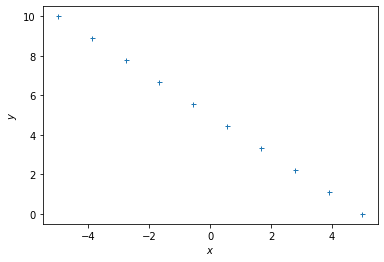

In [9]:
plt.figure()
plt.plot(x_train, y_train, "+", markersize=5)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

#### Let's find $\theta$ using the maximu likelihood method
we know that:
$$
   Y_g = X_g^{T}\theta
$$
then, after finding $\theta$ we'll calculate the loss function using the expression below
$$
   L_{\theta}(x) = 1/2*\sum_{i=1}^{n}(h_{\theta}(x_{i})-y_{i})^2.
$$

#### Finding $\theta$ using the maximum likelihood estimator
$$
    \theta^{ML} = (X_g^T X_g)^{-1} X_g^T Y_g
$$

In [13]:
# solving theta analytically
T = tf.linalg.matrix_transpose

def analytical_theta(X_g, Y_g):
  # return np.linalg.solve(T(X_g) @ X_g, T(X_g) @ Y_g)
  return tf.linalg.solve(T(X_g) @ X_g, T(X_g) @ Y_g)

# Run
theta = analytical_theta(x_train, y_train)
print(theta)

tf.Tensor([[-1.]], shape=(1, 1), dtype=float64)


In [14]:
# Checking data
m, n = x_train.shape
print(m, n)

10 1


In [81]:
def sgd_func(x_train, y_train, lr=0.001, epochs=10, batch_size=10):

  m, n = x_train.shape
  # 
  w = tf.Variable(tf.random.normal((n + 1, 1)), name='w')
  x_new = tf.concat([tf.ones((m, 1)), x_train], axis=1)
  dataset = tf.data.Dataset.from_tensor_slices((x_new, y_train))
  # History for losses at each batch
  loss_history = []

  # SGD optimizer from keras
  optimizer = tf.keras.optimizers.SGD(learning_rate=lr)

  for epoch in range(epochs):
    print("\nStart of epoch %d" % (epoch,))

    # Iterate over the batches of the dataset.
    for step, (x_batch, y_batch) in enumerate(dataset.batch(batch_size=batch_size)):

      # Open a GradientTape to record the operations run
      # during the forward pass, which enables auto-differentiation.
      with tf.GradientTape() as tape:
        y_pred = x_batch @ w
        # Calculate the loss by substracting the actual
        # value from the prediction
        loss = tf.reduce_mean((tf.cast(y_batch, tf.float32) - tf.cast(y_pred, tf.float32))**2) 
        
      # Use the gradient tape to automatically retrieve
      # the gradients of the trainable variables with respect to the loss. 
      grads = tape.gradient(loss, [w])
      loss_history.append(loss)
      # Run one step of gradient descent by updating
      # the value of the variables to minimize the loss.
      optimizer.apply_gradients(zip(grads, [w]))
      # Log every 10 batches.
      if step % 50 == 0:
          print(
              "Training loss (for one batch) at step %d: %.4f"
              % (step, float(loss))
          )
          print("Seen so far: %s samples" % ((step + 1) * batch_size))
    
  return (grads, loss_history)
    




In [82]:
X = 10 * tf.random.uniform(shape=(1000,5), dtype=tf.float32)
y = 0.9 + np.dot(X, [2.2, 4., -4, 1, 2]).reshape(-1, 1)  # target vector
(grads, loss_history) = sgd_func(X, y)


Start of epoch 0
Training loss (for one batch) at step 0: 960.3392
Seen so far: 10 samples
Training loss (for one batch) at step 50: 82.9652
Seen so far: 510 samples

Start of epoch 1
Training loss (for one batch) at step 0: 6.5909
Seen so far: 10 samples
Training loss (for one batch) at step 50: 2.4103
Seen so far: 510 samples

Start of epoch 2
Training loss (for one batch) at step 0: 0.4198
Seen so far: 10 samples
Training loss (for one batch) at step 50: 0.1051
Seen so far: 510 samples

Start of epoch 3
Training loss (for one batch) at step 0: 0.1224
Seen so far: 10 samples
Training loss (for one batch) at step 50: 0.0526
Seen so far: 510 samples

Start of epoch 4
Training loss (for one batch) at step 0: 0.0932
Seen so far: 10 samples
Training loss (for one batch) at step 50: 0.0528
Seen so far: 510 samples

Start of epoch 5
Training loss (for one batch) at step 0: 0.0868
Seen so far: 10 samples
Training loss (for one batch) at step 50: 0.0521
Seen so far: 510 samples

Start of epo

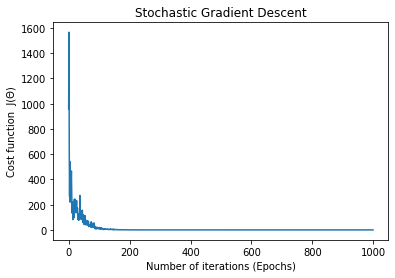

In [83]:
 # visualize how our cost decreases over time
plt.plot(np.arange(len(loss_history)), loss_history)
plt.xlabel("Number of iterations (Epochs)")
plt.ylabel("Cost function  J(Θ)")
plt.title("Stochastic Gradient Descent")
plt.show()